# Create Dataset
We have a folder with images and a csv file with the image names and the labels. There are also some images that are not usable, which have to be excluded. The following script is only run once!

In [1]:
import os # for file handling
import pathlib # for reading files
import pandas as pd # for reading csv files
import numpy as np # for numerical operations
from PIL import Image # for opening images
import shutil # for moving files
import matplotlib.pyplot as plt # for plotting

## Load CSV file

In [2]:
# Load csv file
df = pd.read_csv('labels.csv', header=None)
print("csv file loaded. Number of rows:", len(df))
# Note: Pandas treats the first row as the header by default and does not count it as a data row. 
# Because the file does not contain a header, we will set header=None

# add header row: img, approach
df.columns = ['img', 'approach']

# check first 3 rows
print(df.head(5))

csv file loaded. Number of rows: 61582
                                           img approach
0  2023_12_21_00_07_25_953092_cat_detected.jpg        y
1  2023_12_21_00_07_28_754026_cat_detected.jpg        y
2  2023_12_21_00_07_29_471742_cat_detected.jpg        n
3  2023_12_21_00_07_30_953092_cat_detected.jpg        E
4  2023_12_21_00_49_19_517815_cat_detected.jpg        n


In [3]:
# count category numbers
print("Nr of images with cat approaching", len(df[df['approach'] == 'y']))
print("Nr of images without a cat approaching", len(df[df['approach'] == 'n']))
print("Nr of images to exclude", len(df[df['approach'] == 'x']))
print("Nr of images with prey", len(df[df['approach'] == 'p']))
print("Nr of images with error", len(df[df['approach'] == 'E']))
print("Nr of images total",  len(df[df['approach'] == 'E']) + len(df[df['approach'] == 'x']) + len(df[df['approach'] == 'p']) + len(df[df['approach'] == 'n']) + len(df[df['approach'] == 'y']))

Nr of images with cat approaching 19109
Nr of images without a cat approaching 42024
Nr of images to exclude 235
Nr of images with prey 212
Nr of images with error 2
Nr of images total 61582


In [4]:
# Define the path to the "cats_training" folder
image_folder = 'C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\cats_approach_training_2024_05_19'

print("Image folder:", image_folder)

Image folder: C:\Users\mirela\Documents\gitRepos\CatWatcher\cats_approach_training_2024_05_19


In [5]:
# count number of items in the folder
print("Number of items in the folder:", len(os.listdir(image_folder)))
# Note: This counts also the hidden file called Thumbs.db (it's hidden even if showing hidden files)

Number of items in the folder: 3


### Display some example images

Displaying 2023_12_21_00_07_28_754026_cat_detected.jpg:


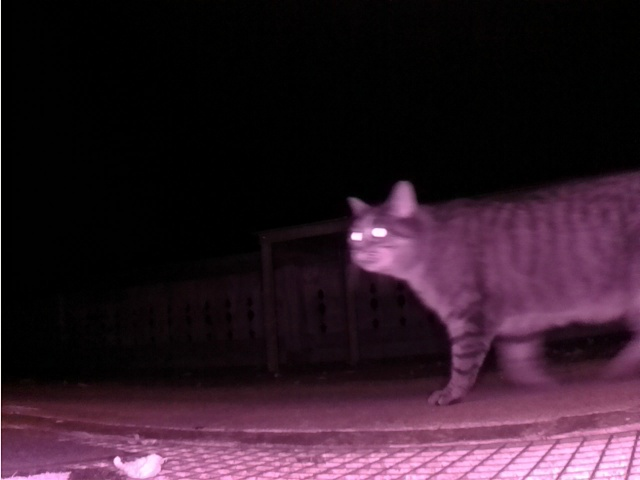

Displaying 2023_12_21_01_00_56_143100_cat_detected.jpg:


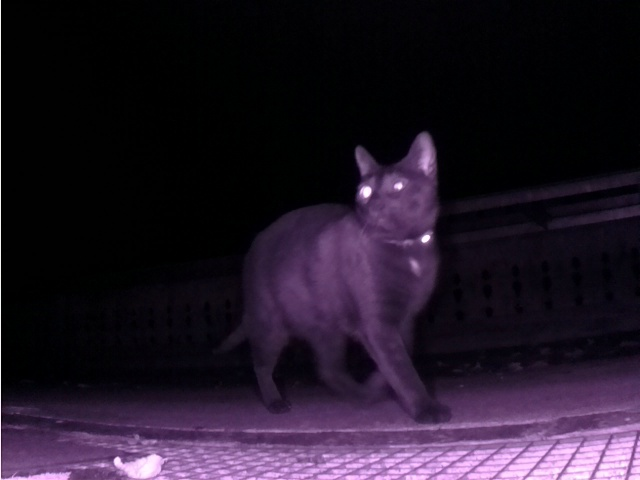

Displaying 2023_12_21_06_50_26_129435_cat_detected.jpg:


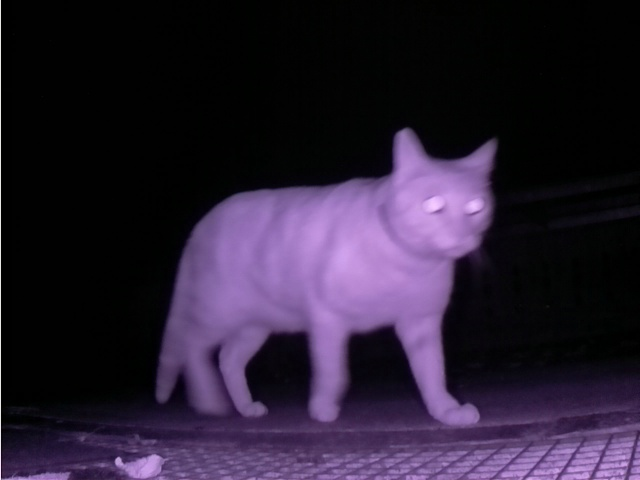

In [6]:
# Iterate through the .jpg files in the folder and display each image
examples_folder = 'examples'

for filename in os.listdir(examples_folder):
    if filename.lower().endswith('.jpg'):
        # Open the image file
        with Image.open(os.path.join(examples_folder, filename)) as img:
            # Display the image
            print(f"Displaying {filename}:")
            display(img)

In [7]:
# Iterate through the .jpg files in the folder and display properties
for filename in os.listdir(examples_folder):
    if filename.lower().endswith('.jpg'):
        # Path to the image file
        file_path = os.path.join(examples_folder, filename)
        
        # Open the image file
        with Image.open(file_path) as img:
            # Display the image properties
            file_size = os.path.getsize(file_path)  # File size in bytes
            dimensions = img.size  # Dimensions of the image (width x height)
            mode = img.mode  # Image mode (e.g., RGB, L)
            channels = img.getbands()  # Gets the channels (e.g., ('R', 'G', 'B') for RGB)
            
            print(f"Filename: {filename}")
            print(f"  File Size: {file_size} bytes")
            print(f"  Dimensions: {dimensions} (width x height pixels)")
            print(f"  Mode: {mode}")
            print(f"  Channels: {channels}")
            print()

Filename: 2023_12_21_00_07_28_754026_cat_detected.jpg
  File Size: 54446 bytes
  Dimensions: (640, 480) (width x height pixels)
  Mode: RGB
  Channels: ('R', 'G', 'B')

Filename: 2023_12_21_01_00_56_143100_cat_detected.jpg
  File Size: 54478 bytes
  Dimensions: (640, 480) (width x height pixels)
  Mode: RGB
  Channels: ('R', 'G', 'B')

Filename: 2023_12_21_06_50_26_129435_cat_detected.jpg
  File Size: 44718 bytes
  Dimensions: (640, 480) (width x height pixels)
  Mode: RGB
  Channels: ('R', 'G', 'B')



## Move images to subfolder according to their labels (~10min)

In [ ]:
# Iterate over the DataFrame rows
for index, row in df.iterrows():
    source_file = os.path.join(image_folder, row['img'])
    if os.path.exists(source_file):  # Check if the file exists
        # Define the target directory based on the 'approach' column
        target_dir = os.path.join(image_folder, str(row['approach']).strip().lower())
        os.makedirs(target_dir, exist_ok=True)  # Create target directory if it doesn't exist

        # Move the file
        shutil.move(source_file, os.path.join(target_dir, row['img']))
    else:
        print(f"File not found: {source_file}")  # Print a message if the file does not exist

print("Files have been moved based on labels.")

We will only use the images labeled as y, n, p. At a later point we will use the prey labels for training the model that detects prey in approaching cats. But first, we will train the model for cats approaching. Thus, we'll rename the values p to y.

In [ ]:
# Exclude rows with 'x' in the 'approach' column
df = df[df['approach'] != 'x']

# Exclude rows with 'E' in the 'approach' column
df = df[df['approach'] != 'E']

# Rename 'p' to 'y' in the 'approach' column
df['approach'] = df['approach'].apply(lambda x: 'y' if x == 'p' else x)

# count category numbers for approach = y and approach = n
print("Nr of images with cat approaching", len(df[df['approach'] == 'y']))
print("Nr of images without a cat approaching", len(df[df['approach'] == 'n']))
print("Nr of images to exclude", len(df[df['approach'] == 'x']))
print("Nr of images with prey", len(df[df['approach'] == 'p']))
print("Nr of images with error", len(df[df['approach'] == 'E']))
print("Nr of images VALID",  len(df[df['approach'] == 'E']) + len(df[df['approach'] == 'x']) + len(df[df['approach'] == 'p']) + len(df[df['approach'] == 'n']) + len(df[df['approach'] == 'y']))

COPY images with prey to the folder y.

In [9]:
data_dir = pathlib.Path('C:\\Users\\mirela\\Documents\\gitRepos\\CatWatcher\\cats_approach_training_2024_05_19')
print(f"Directory path: {data_dir}")
print(f"Nr of total images: {len(list(data_dir.glob('*/*.jpg')))}")

n_count = len(list(data_dir.glob('n/*.jpg')))
print(f"Nr of non approaching cats: {n_count}")

y_count = len(list(data_dir.glob('y/*.jpg')))
print(f"Nr of approaching cats: {y_count}")

Directory path: C:\Users\mirela\Documents\gitRepos\CatWatcher\cats_approach_training_2024_05_19
Nr of total images: 21306
Nr of non approaching cats: 14450
Nr of approaching cats: 6856


REMOVE unused folders from the directory. 
Here are some approaching cats

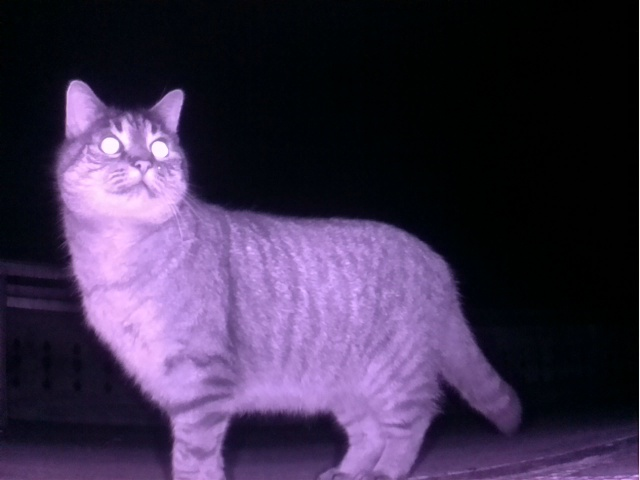

In [10]:
y = list(data_dir.glob('y/*'))
Image.open(str(y[101]))

Here are some non approaching cats

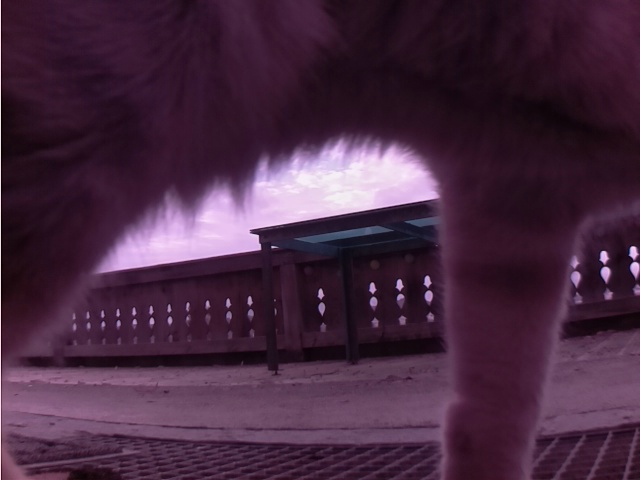

In [11]:
n = list(data_dir.glob('n/*'))
Image.open(str(n[101]))

## Next steps
* remove duplicates (see RemoveDuplicates)
* rename files (see RenameFiles)